# CLIP Zero-shot Classification

In [3]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-6y2g0kdq
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-6y2g0kdq
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_

In [4]:
import os
import clip
import torch
from torchvision.datasets import CIFAR100
import matplotlib.pyplot as plt

In [5]:
# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

100%|██████████| 169001437/169001437 [00:03<00:00, 43799649.09it/s]


Extracting /root/.cache/cifar-100-python.tar.gz to /root/.cache


In [6]:
print(len(cifar100))
print(cifar100[0])

10000
(<PIL.Image.Image image mode=RGB size=32x32 at 0x7E8C30FF47C0>, 49)


In [7]:
class_labels = cifar100.classes
print(class_labels[:10])
print(len(class_labels))

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle']
100


snake


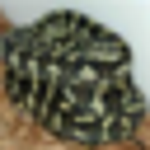

In [8]:
image, class_id = cifar100[3637]
print(class_labels[class_id])
image_resize = image.resize((150,150))
image_resize

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-L/14', device)

100%|███████████████████████████████████████| 890M/890M [00:46<00:00, 19.9MiB/s]


In [10]:
print(model.visual)

VisionTransformer(
  (conv1): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
  (ln_pre): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (transformer): Transformer(
    (resblocks): Sequential(
      (0): ResidualAttentionBlock(
        (attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
        )
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): Sequential(
          (c_fc): Linear(in_features=1024, out_features=4096, bias=True)
          (gelu): QuickGELU()
          (c_proj): Linear(in_features=4096, out_features=1024, bias=True)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      )
      (1): ResidualAttentionBlock(
        (attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
        )
        (ln_1): LayerNorm((1024,), eps=1e-05, 

In [11]:
print(model.transformer)

Transformer(
  (resblocks): Sequential(
    (0): ResidualAttentionBlock(
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
      )
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (c_fc): Linear(in_features=768, out_features=3072, bias=True)
        (gelu): QuickGELU()
        (c_proj): Linear(in_features=3072, out_features=768, bias=True)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
    (1): ResidualAttentionBlock(
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
      )
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (c_fc): Linear(in_features=768, out_features=3072, bias=True)
        (gelu): QuickGELU()
        (c_proj): Linear(in_features=3072, out_features=768, bias=True)
      

In [12]:
preprocess.transforms

[Resize(size=224, interpolation=bicubic, max_size=None, antialias=True),
 CenterCrop(size=(224, 224)),
 <function clip.clip._convert_image_to_rgb(image)>,
 ToTensor(),
 Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))]

In [13]:
image_input = preprocess(image).unsqueeze(0).to(device)
print(image_input.shape)

torch.Size([1, 3, 224, 224])


In [14]:
photo_labels = [(f"a photo of a {c}") for c in class_labels]
photo_labels[:10]

['a photo of a apple',
 'a photo of a aquarium_fish',
 'a photo of a baby',
 'a photo of a bear',
 'a photo of a beaver',
 'a photo of a bed',
 'a photo of a bee',
 'a photo of a beetle',
 'a photo of a bicycle',
 'a photo of a bottle']

In [15]:
text_inputs = torch.cat([clip.tokenize(c) for c in photo_labels]).to(device)

In [16]:
text_inputs.shape

torch.Size([100, 77])

In [17]:
print(photo_labels[0])
print(text_inputs[0])

# <|startoftext|> --> 49406
# <|endoftext|> --> 49407

a photo of a apple
tensor([49406,   320,  1125,   539,   320,  3055, 49407,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0], device='cuda:0',
       dtype=torch.int32)


In [18]:
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# https://github.com/openai/CLIP/blob/main/clip/model.py

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


In [19]:
image_features.shape

torch.Size([1, 768])

In [20]:
text_features.shape

torch.Size([100, 768])

In [21]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

In [22]:
similarity

tensor([[3.0537e-03, 2.5970e-02, 6.3629e-03, 1.8520e-03, 2.8248e-03, 4.2145e-02,
         8.2207e-04, 2.4529e-03, 7.4816e-04, 9.0265e-04, 2.4529e-03, 1.2732e-03,
         1.8334e-04, 2.3913e-04, 3.0060e-03, 3.5357e-04, 6.6681e-03, 4.3571e-05,
         5.7030e-03, 1.4343e-02, 3.9825e-03, 9.9087e-04, 6.9189e-04, 6.0129e-04,
         2.9302e-04, 5.0842e-02, 1.4343e-02, 7.9193e-03, 1.4877e-03, 1.5354e-03,
         9.8944e-06, 1.7128e-03, 6.2637e-03, 5.0640e-04, 3.3212e-04, 8.6117e-04,
         1.0170e-02, 8.8882e-04, 3.2687e-04, 1.1959e-03, 1.6861e-03, 4.1504e-02,
         3.5492e-02, 3.7050e-04, 4.2816e-02, 2.7370e-03, 3.7050e-04, 5.6505e-04,
         3.9215e-03, 6.9189e-04, 7.3975e-02, 3.6621e-02, 2.3186e-04, 9.7609e-04,
         7.7200e-04, 5.1155e-03, 5.3072e-04, 7.9513e-05, 5.1155e-03, 8.5294e-05,
         6.9885e-03, 4.5128e-03, 1.2732e-03, 8.8882e-04, 8.3983e-05, 1.9608e-02,
         8.8882e-04, 3.6478e-04, 2.3842e-05, 1.5676e-05, 8.8882e-04, 2.6679e-04,
         3.3736e-04, 1.7500e

In [23]:
values, indices = similarity[0].topk(5)
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")


Top predictions:

           snake: 27.49%
          turtle: 14.49%
           mouse: 7.40%
           couch: 5.08%
          lizard: 4.28%
